In [1]:
## remove this, this is for my personal pc setup
import sys; import os; sys.path.append(os.path.expanduser('~/DropBox/my/projects/T/'))

In [2]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
import keras

import seaborn           as sns
%config InlineBackend.figure_format = 'retina'

Using TensorFlow backend.


In [3]:
#%% Read data
dataset = pd.read_csv('../_data/car_data.csv')
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


In [4]:
#%% Split into train and test data
dataset = dataset.dropna()
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)
print("Number of datapoints in training set:", train_dataset.shape[0])
print("Number of datapoints in test set:", test_dataset.shape[0])

Number of datapoints in training set: 314
Number of datapoints in test set: 78


In [5]:
#%% Labels
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')
print("Number of distinct features:", train_dataset.shape[1])

Number of distinct features: 9


In [6]:
#%% Why normalize?
train_stats = train_dataset.describe()
train_stats

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
count,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
mean,5.477707,195.318471,104.869427,2990.251592,15.559236,75.898089,0.624204,0.178344,0.197452
std,1.699788,104.331589,38.096214,843.898596,2.789230,3.675642,0.485101,0.383413,0.398712
min,3.000000,68.000000,46.000000,1649.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,4.000000,105.500000,76.250000,2256.500000,13.800000,73.000000,0.000000,0.000000,0.000000
50%,4.000000,151.000000,94.500000,2822.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,8.000000,265.750000,128.000000,3608.000000,17.200000,79.000000,1.000000,0.000000,0.000000
max,8.000000,455.000000,225.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


In [7]:
#%% Normalize
train_data_norm = (train_dataset - train_stats.transpose()['mean']) / train_stats.transpose()['std']
test_data_norm = (test_dataset - train_stats.transpose()['mean']) / train_stats.transpose()['std']
train_data_norm.describe()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
count,3.140000e+02,3.140000e+02,3.140000e+02,3.140000e+02,3.140000e+02,3.140000e+02,3.140000e+02,3.140000e+02,3.140000e+02
mean,1.824443e-16,8.627211e-17,-9.900078e-18,-8.485781e-17,-5.148041e-16,9.772791e-16,7.920062e-17,1.980016e-17,5.374328e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.457657e+00,-1.220325e+00,-1.545283e+00,-1.589352e+00,-2.710152e+00,-1.604642e+00,-1.286751e+00,-4.651484e-01,-4.952254e-01
25%,-8.693480e-01,-8.608943e-01,-7.512407e-01,-8.694784e-01,-6.307245e-01,-7.884578e-01,-1.286751e+00,-4.651484e-01,-4.952254e-01
50%,-8.693480e-01,-4.247848e-01,-2.721905e-01,-1.987817e-01,-2.123729e-02,2.772599e-02,7.746764e-01,-4.651484e-01,-4.952254e-01
75%,1.483887e+00,6.750739e-01,6.071620e-01,7.320173e-01,5.882500e-01,8.439098e-01,7.746764e-01,-4.651484e-01,-4.952254e-01
max,1.483887e+00,2.489002e+00,3.153347e+00,2.547401e+00,3.313017e+00,1.660094e+00,7.746764e-01,2.143005e+00,2.012852e+00


In [8]:
#%% Build the model
model = keras.Sequential()
model.add(keras.layers.Dense(64, activation='relu', input_shape = [train_data_norm.shape[1]], name='hidden_layer_1'))
model.summary()

W0926 15:30:53.887660  1524 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0926 15:30:53.916656  1524 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0926 15:30:53.921657  1524 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer_1 (Dense)       (None, 64)                640       
Total params: 640
Trainable params: 640
Non-trainable params: 0
_________________________________________________________________


In [9]:
#%% Add another hidden layer
model.add(keras.layers.Dense(64, activation='relu', name='hidden_layer_2'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer_1 (Dense)       (None, 64)                640       
_________________________________________________________________
hidden_layer_2 (Dense)       (None, 64)                4160      
Total params: 4,800
Trainable params: 4,800
Non-trainable params: 0
_________________________________________________________________


In [10]:
#%% And then the output layer
model.add(keras.layers.Dense(1, activation=None, name='output_layer'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer_1 (Dense)       (None, 64)                640       
_________________________________________________________________
hidden_layer_2 (Dense)       (None, 64)                4160      
_________________________________________________________________
output_layer (Dense)         (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [11]:
#%% Compile the model
learning_rate = 0.001
optimizer = keras.optimizers.Adam(lr=learning_rate)
model.compile(loss='mean_squared_error',
              optimizer=optimizer,
              metrics=['mean_squared_error'])

W0926 15:30:54.064661  1524 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [12]:
#%% Train the model
history = model.fit(train_data_norm, train_labels,
                    epochs=100, validation_split = 0.2)
hist = history.history

W0926 15:30:54.276697  1524 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0926 15:30:54.394693  1524 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Train on 251 samples, validate on 63 samples
Epoch 1/100
251/251 [==============================] - 1s 4ms/step - loss: 579.0539 - mean_squared_error: 579.0539 - val_loss: 585.0202 - val_mean_squared_error: 585.0202
Epoch 2/100
251/251 [==============================] - 0s 80us/step - loss: 544.5436 - mean_squared_error: 544.5436 - val_loss: 547.8251 - val_mean_squared_error: 547.8251
Epoch 3/100
251/251 [==============================] - 0s 219us/step - loss: 507.9266 - mean_squared_error: 507.9266 - val_loss: 506.0243 - val_mean_squared_error: 506.0243
Epoch 4/100
251/251 [==============================] - 0s 319us/step - loss: 465.9986 - mean_squared_error: 465.9986 - val_loss: 455.4739 - val_mean_squared_error: 455.4739
Epoch 5/100
251/251 [==============================] - 0s 131us/step - loss: 415.0525 - mean_squared_error: 415.0525 - val_loss: 395.4893 - val_mean_squared_error: 395.4893
Epoch 6/100
251/251 [==============================] - 0s 100us/step - loss: 354.7916 - mean_

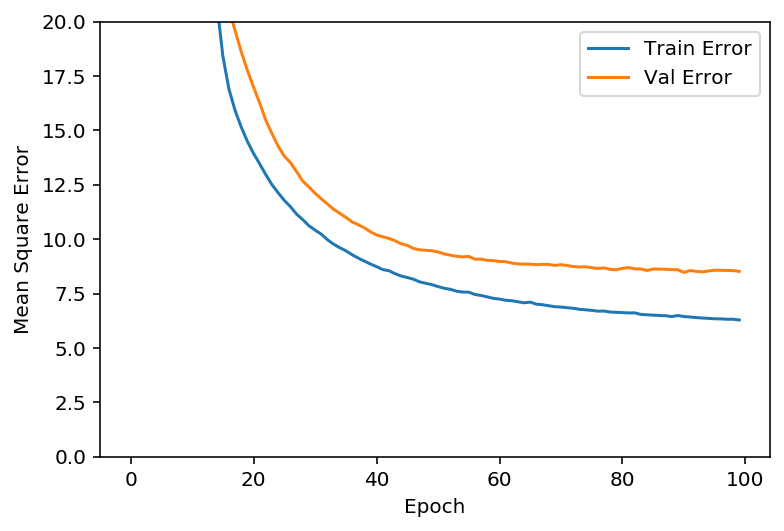

In [13]:
plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error')
plt.plot(history.epoch, hist['mean_squared_error'],
       label='Train Error')
plt.plot(history.epoch, hist['val_mean_squared_error'],
       label = 'Val Error')
plt.ylim([0,20])
plt.legend()
plt.show()

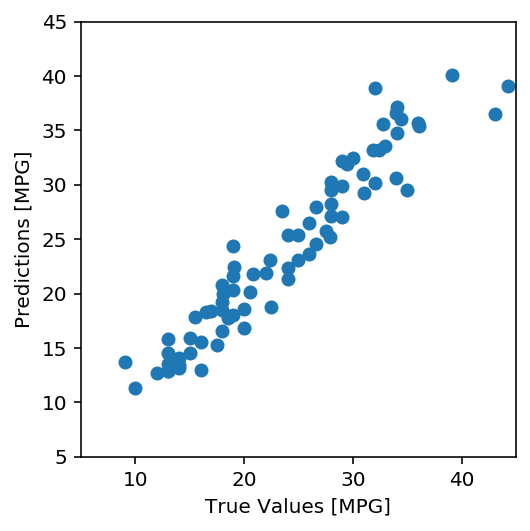

Testing set error:  1.87 MPG


In [14]:
test_predictions = model.predict(test_data_norm)
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('square')
plt.xlim([5,45])
plt.ylim([5,45])
plt.show()
error = np.mean(abs(test_predictions.flatten()-test_labels))
print("Testing set error: {:5.2f} MPG".format(error))
